<a href="https://colab.research.google.com/github/ThomasAlbin/Astroniz-YT-Tutorials/blob/main/CompressedCosmos/CompressedCosmos_SunMoonDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partial Solar Eclipse

*Note: PLEASE DO NOT LOOK EVER DIRECT INTO THE SUN!*

This script computes the angular distance between the Sun and the Moon, with the partial solar eclipse as a small use case

In [1]:
# Using Astropy in this script
from astropy.coordinates import EarthLocation, get_body
from astropy.time import Time
from astropy.units import deg, m

import numpy as np

# Latitutde and longitude coordiantes of the observer's location in degrees
lat = 48.0
lon = 9.0

# Function to compute the angular separation betwee the Sun and the Moon
def sun_moon_separation(lat, lon, t):

    # Set the observer location
    loc = EarthLocation(lat=lat, lon=lon, height=0)

    # Use astropy time
    time = Time(t, format="datetime")

    # Compute the SkyCoords for the moon and sun
    moon = get_body("moon", time, loc)
    sun = get_body("sun", time, loc)

    # Compute the "separation" and return the values in degrees
    sep = moon.separation(sun)
    return sep.deg

In [2]:
# DateTime consideration
from datetime import datetime, timezone, timedelta
from dateutil import tz

# Set your local timezone
local_zone = tz.gettz('Europe/Berlin')

# Define start and end time. Note that we use the local time zone!
dt_start = datetime(2025, 3, 29, 8, 0, 0, tzinfo=local_zone)
dt_end = datetime(2025, 3, 29, 15, 0, 0, tzinfo=local_zone)

In [3]:
# In 60s steps we compute the angular separation
dt = dt_start
dt_step = []
angle_dist = []

while dt < dt_end:

    angle_dist.append(sun_moon_separation(lat, lon, dt))
    dt_step.append(dt)
    dt = dt + timedelta(seconds=60)

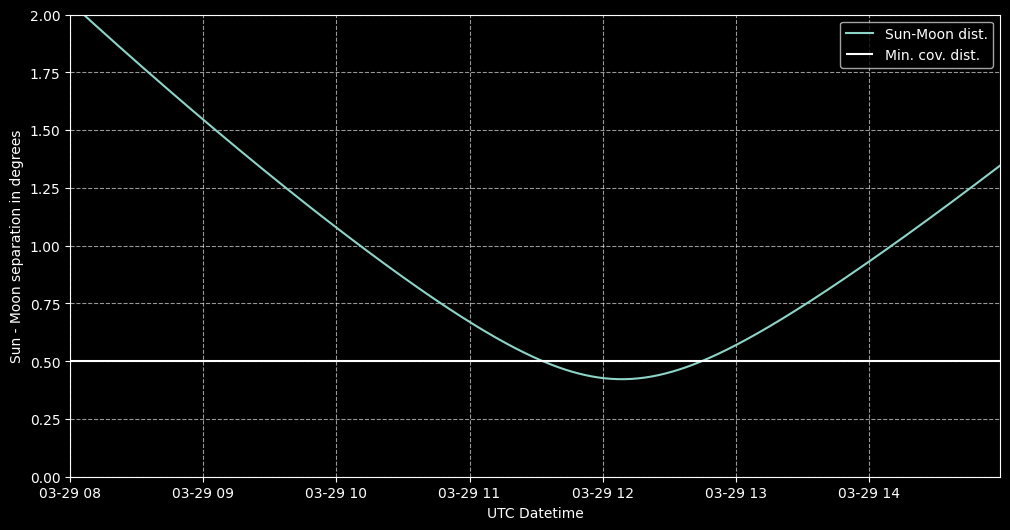

In [4]:
# Plot the results
from matplotlib import pyplot as plt

# Use a dark background
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))

# Plot
plt.plot(dt_step, angle_dist, label="Sun-Moon dist.")

# Labels
plt.xlabel("UTC Datetime")
plt.ylabel("Sun - Moon separation in degrees")

# Sun is covered for <0.5 degrees distance
plt.hlines(0.5, dt_step[0], dt_step[-1], label="Min. cov. dist.")

# Formatting
plt.grid(linestyle="dashed", alpha=0.6)
plt.ylim(0, 2)
plt.xlim(dt_step[0], dt_step[-1])

plt.legend(fancybox=True)

plt.show()